# Problem 1

$y_{des}$ is given as a square wave with periodicity $0.015\pi$.

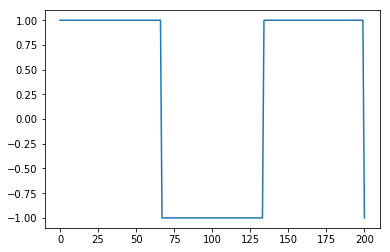

In [18]:
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, linalg

def h(t):
    return 1/9*(0.9)**t*(1-0.4*np.cos(2*t))

t = np.linspace(0, 200, 201)
%matplotlib inline
ydes = signal.square(0.015*np.pi*t)
plt.plot(t, ydes)
N = 200

In [19]:
u = Variable(N+1)
H = np.zeros((N+1, N+1))
D = np.zeros((N, N+1))
Hrow = np.zeros((1, N+1))
Hcol = np.zeros((N+1, 1))
Hcol[0,0] = h(0)
for i in range(0, N+1):
    Hrow[0,i] = h(i)
for i in range(0, N):
    D[i][i] = -1
    D[i][i+1] = 1

H = linalg.toeplitz(Hcol, Hrow)

delta = 0
eta = 0.005
objective = Minimize(sum_squares(ydes - H*u)/(N+1) + eta*sum_squares(u)/(N+1) + delta*sum_squares(D*u)/N)
prob = Problem(objective)
prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.574e-19  -2.566e-02  +2e+00  4e-01  6e-02  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +6.247e-02  -4.465e-03  +3e-01  1e-02  6e-03  8e-03  1e-01  0.9132  1e-03   1  1  1 |  0  0
 2  +2.281e-02  +1.536e-02  +4e-02  1e-03  7e-04  2e-03  1e-02  0.8647  6e-03   1  1  1 |  0  0
 3  +2.306e-02  +2.135e-02  +1e-02  6e-04  3e-04  4e-03  5e-03  0.8343  3e-01   2  1  1 |  0  0
 4  +1.997e-02  +1.986e-02  +4e-03  1e-04  1e-04  2e-03  2e-03  0.8570  2e-01   2  2  1 |  0  0
 5  +2.130e-02  +2.174e-02  +2e-03  1e-04  6e-05  2e-03  8e-04  0.7304  3e-01   2  1  2 |  0  0
 6  +2.111e-02  +2.113e-02  +2e-04  1e-05  7e-06  2e-04  1e-04  0.8824  1e-02   1  2  2 |  0  0
 7  +2.127e-02  +2.127e-02  +5e-05  2e-06  2e-06  3e-05  2e-05  0.8060  3e-02   2  1  1 |  0  0
 8  +2.128e-02  +2.128e-02  +8e-06  3e-07  2e-

0.021283216882476426

$\delta$ = 0 and $\eta = 0.005$

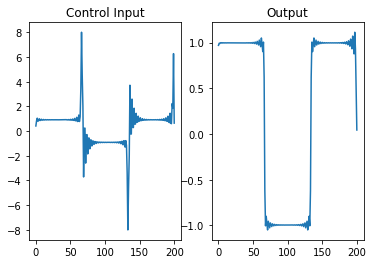

In [24]:
%matplotlib inline
fig, ax = plt.subplots(1, 2)
ax[0].plot(t,u.value)
ax[0].set_title("Control Input")
ax[1].plot(t, H*u.value)
ax[1].set_title("Output")

In [25]:
delta = 0
eta = 0.05
objective = Minimize(sum_squares(ydes - H*u)/(N+1) + eta*sum_squares(u)/(N+1) + delta*sum_squares(D*u)/N)
prob = Problem(objective)
prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.565e-19  -2.566e-02  +2e+00  4e-01  6e-02  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +7.870e-02  -2.630e-03  +4e-01  1e-02  7e-03  8e-03  1e-01  0.8931  2e-03   1  1  1 |  0  0
 2  +4.440e-02  +3.057e-02  +7e-02  4e-03  1e-03  5e-03  3e-02  0.7989  2e-02   1  1  1 |  0  0
 3  +7.313e-02  +6.730e-02  +3e-02  8e-03  9e-04  2e-02  1e-02  0.7446  3e-01   1  1  1 |  0  0
 4  +6.422e-02  +6.558e-02  +8e-03  9e-04  2e-04  6e-03  4e-03  0.9161  2e-01   2  1  1 |  0  0
 5  +7.687e-02  +7.996e-02  +2e-03  6e-04  9e-05  5e-03  1e-03  0.7535  4e-02   2  1  1 |  0  0
 6  +8.035e-02  +8.186e-02  +1e-03  4e-04  5e-05  3e-03  6e-04  0.6263  3e-01   2  1  1 |  0  0
 7  +8.718e-02  +8.776e-02  +1e-04  6e-05  7e-06  8e-04  6e-05  0.9430  5e-02   3  1  1 |  0  0
 8  +8.806e-02  +8.820e-02  +3e-05  1e-05  2e-

0.0882973977008439

$\delta$ = 0 and $\eta = 0.05$

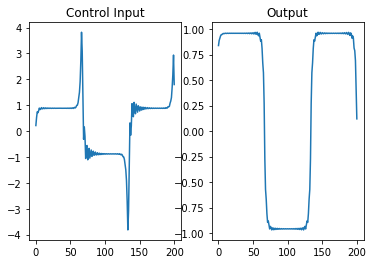

In [27]:
%matplotlib inline
fig, ax = plt.subplots(1, 2)
ax[0].plot(t,u.value)
ax[0].set_title("Control Input")
ax[1].plot(t, H*u.value)
ax[1].set_title("Output")

In [28]:
delta = 0.3
eta = 0.05
objective = Minimize(sum_squares(ydes - H*u)/(N+1) + eta*sum_squares(u)/(N+1) + delta*sum_squares(D*u)/N)
prob = Problem(objective)
prob.solve(verbose=True)


ECOS 2.0.4 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +9.639e-22  -2.918e-02  +4e+00  4e-01  6e-02  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  +1.001e-01  +2.849e-04  +7e-01  2e-02  7e-03  7e-03  2e-01  0.8582  1e-02   1  1  1 |  0  0
 2  +5.233e-02  +3.517e-02  +1e-01  5e-03  1e-03  3e-03  4e-02  0.8029  1e-02   1  1  1 |  0  0
 3  +8.176e-02  +6.837e-02  +8e-02  9e-03  1e-03  1e-02  2e-02  0.6520  3e-01   2  2  2 |  0  0
 4  +7.329e-02  +7.378e-02  +2e-02  1e-03  3e-04  7e-03  6e-03  0.9145  2e-01   2  1  1 |  0  0
 5  +8.735e-02  +8.951e-02  +4e-03  5e-04  8e-05  4e-03  1e-03  0.8750  9e-02   2  2  2 |  0  0
 6  +9.634e-02  +9.723e-02  +3e-04  9e-05  9e-06  1e-03  1e-04  0.9289  3e-02   2  1  1 |  0  0
 7  +9.813e-02  +9.832e-02  +8e-05  2e-05  2e-06  3e-04  3e-05  0.8340  7e-02   2  1  1 |  0  0
 8  +9.853e-02  +9.854e-02  +8e-06  2e-06  2e-

0.09858037827241066

$\delta$ = 0.3 and $\eta = 0.05$

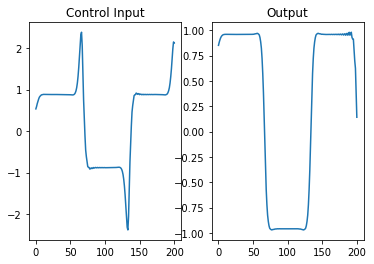

In [30]:
%matplotlib inline
fig, ax = plt.subplots(1, 2)
ax[0].plot(t,u.value)
ax[0].set_title("Control Input")
ax[1].plot(t, H*u.value)
ax[1].set_title("Output")